# importing libraries

In [23]:
import tensorflow as tf
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , RMSprop , Adagrad , Adamax , SGD
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D ,Input, Lambda, LeakyReLU, BatchNormalization
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from glob import glob
from tensorflow.keras.regularizers import l2 , l1
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns
import matplotlib.image as img
from IPython.display import Image as IPyImage
from PIL import Image

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils 
from sklearn.model_selection import train_test_split
from numpy import interp
from tensorflow.keras.layers import InputLayer , TimeDistributed, LSTM
from tensorflow.keras import layers

# Loading dataset

## Defining a fuction for loading images ... 

In [2]:
IMM_SIZE = 28

In [4]:
def load_data(folder):
    class_names = [f for f in os.listdir(folder) if not f.startswith('.')] # ctreate a list of SubFolders

    data = []
    print(class_names)
    for t, f in enumerate(class_names):
        images = glob(folder + "/" + f + "/*")
        print("loading: ", f)
        fig = plt.figure(figsize = (50,50)) 
        for im_n, im in enumerate(images):
            plt.gray() 
            image = cv2.imread(im)
            if len(image.shape) > 2:
                image = cv2.resize(image, (IMM_SIZE, IMM_SIZE), interpolation = cv2.INTER_LINEAR) 
            else:
                image = cv2.resize(image, (IMM_SIZE, IMM_SIZE))
            if len(image.shape) > 2:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                image.flatten()
                                           
            data.append([image, f])
        

    return np.array(data) 

In [5]:
data_path='C:/Users/Iman/Desktop/DL project/dataset/data'

In [6]:
data = load_data(data_path)

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']
loading:  adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
loading:  large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
loading:  normal
loading:  squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa


C:\Users\Iman\Anaconda3\envs\tf2.8\lib\site-packages\ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

C:\Users\Iman\Anaconda3\envs\tf2.8\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


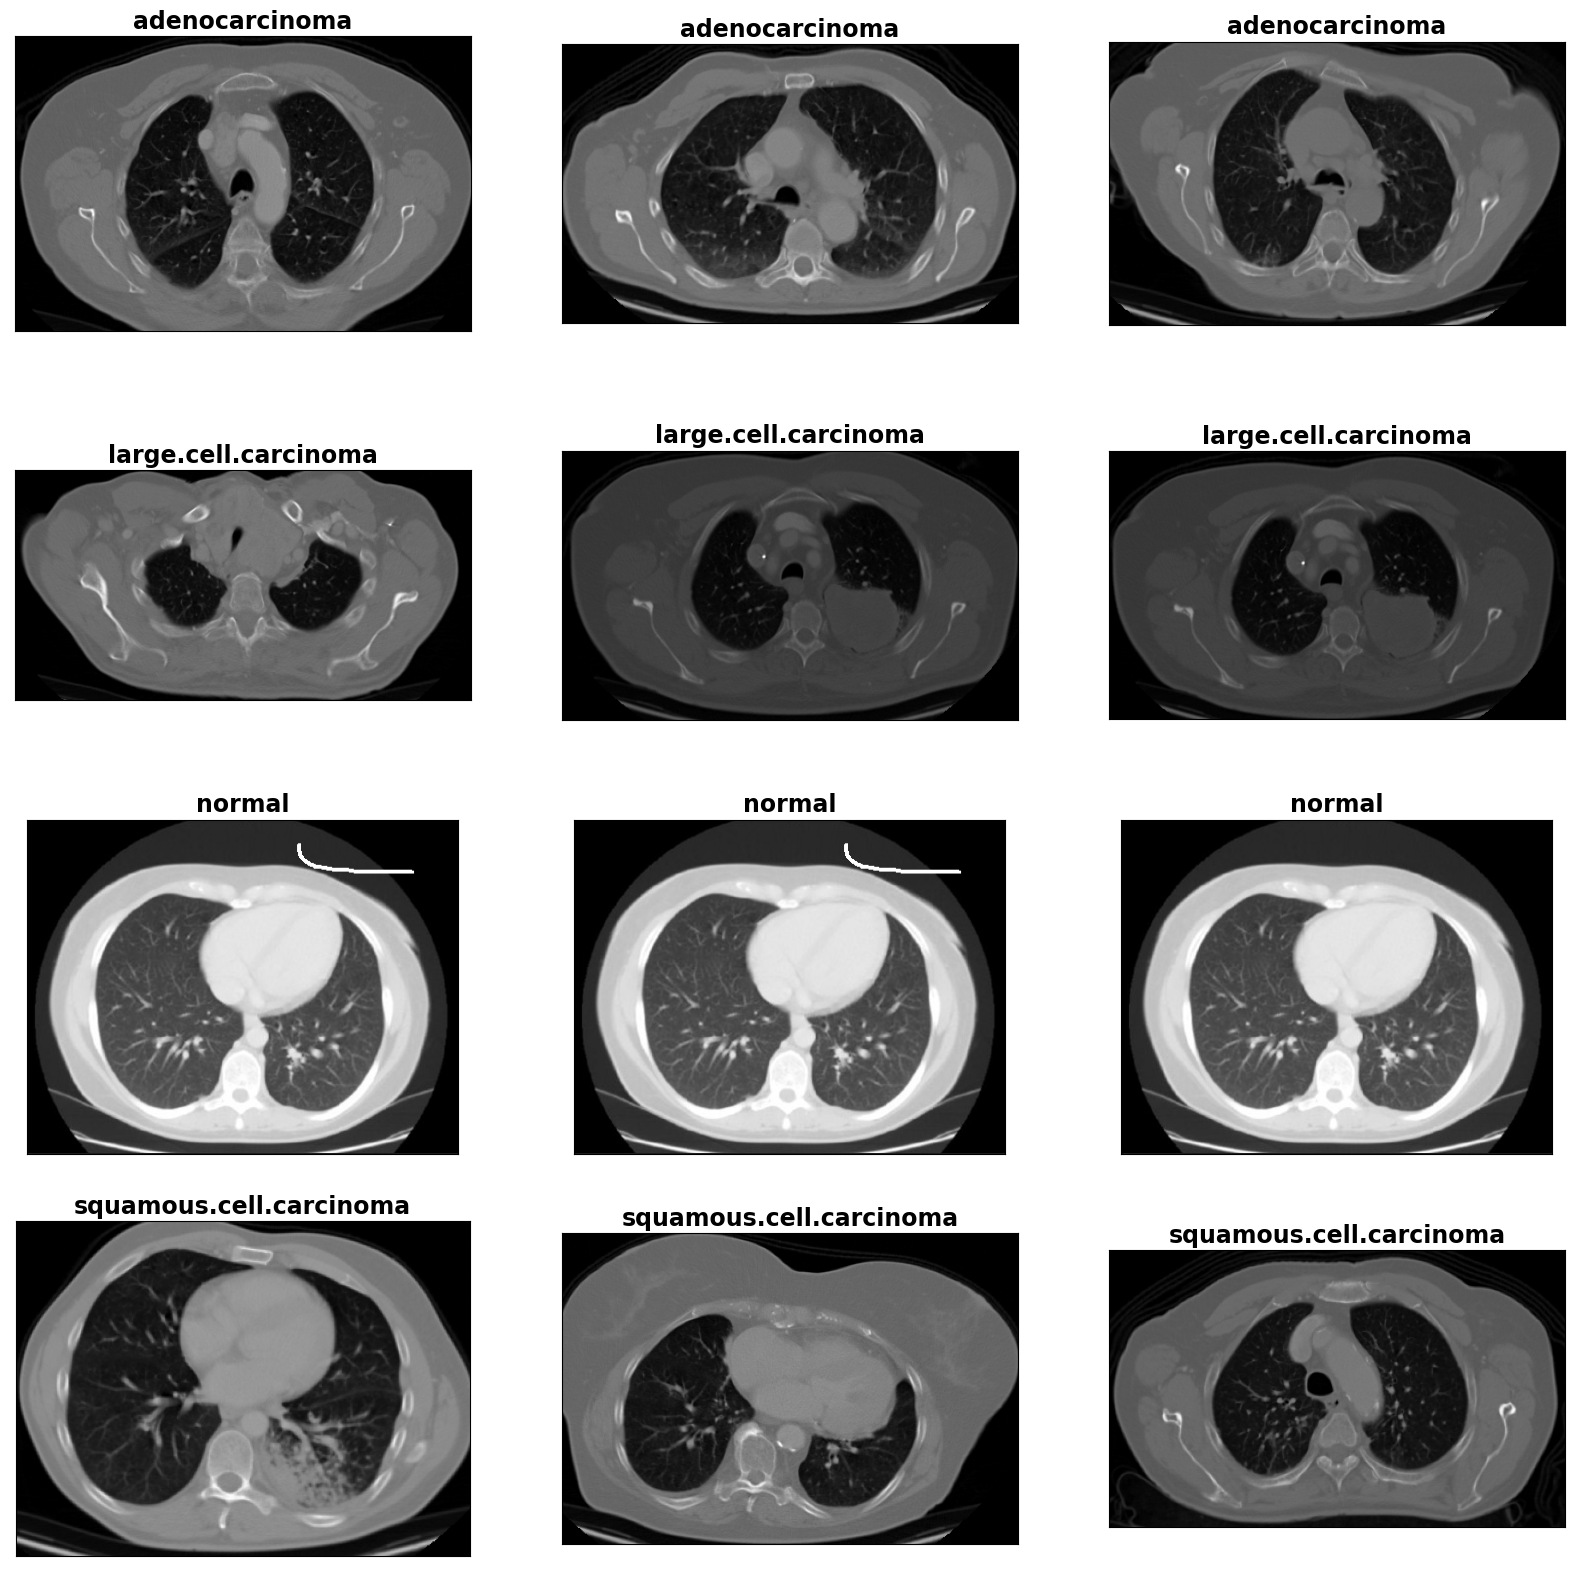

In [7]:
fig, ax = plt.subplots(4,3,figsize=(4*5,4*5))

for i in range(3):
    path=f"C:/Users/Iman/Desktop/DL project/show/new/0{i+1}.png"
    image=img.imread(path)
    ax[0][i].imshow(image)
    ax[0][i].axes.xaxis.set_visible(False)
    ax[0][i].axes.yaxis.set_visible(False)
    ax[0][i].set_title('adenocarcinoma',fontweight="bold",size=17)
for i in range(3):
    path=f"C:/Users/Iman/Desktop/DL project/show/New folder (2)/0{i+1}.png"
    image=img.imread(path)
    ax[1][i].imshow(image)
    ax[1][i].axes.xaxis.set_visible(False)
    ax[1][i].axes.yaxis.set_visible(False)
    ax[1][i].set_title('large.cell.carcinoma',fontweight="bold",size=17)
    
for i in range(3):
    path=f"C:/Users/Iman/Desktop/DL project/show/New folder (3)/0{i+1}.png"
    image=img.imread(path)
    ax[2][i].imshow(image)
    ax[2][i].axes.xaxis.set_visible(False)
    ax[2][i].axes.yaxis.set_visible(False)
    ax[2][i].set_title('normal',fontweight="bold",size=17)

for i in range(3):
    path=f"C:/Users/Iman/Desktop/DL project/show/New folder (4)/0{i+1}.png"
    image=img.imread(path)
    ax[3][i].imshow(image)
    ax[3][i].axes.xaxis.set_visible(False)
    ax[3][i].axes.yaxis.set_visible(False)
    ax[3][i].set_title('squamous.cell.carcinoma',fontweight="bold",size=17)    
fig.show()

# Preprocessing

## Segregation between images and labels 

In [7]:
images = []
labels = []


for feature, label in data:
    images.append(feature)
    labels.append(label)

#min_max normalization
images = np.array(images) / 255.0

# Resizing input images
images = images.reshape(-1, IMM_SIZE, IMM_SIZE, 1)

# Creating a dictionary of clases
lab = {}
for i, l in enumerate(set(labels)):
    lab[l] = i


labels = np.array([lab[l] for l in labels])

In [8]:
print("Shape of the input DataSet:", images.shape)
print("Shape of the output DataSet:", labels.shape)
print("Dictionary of classes:", lab)

Shape of the input DataSet: (900, 28, 28, 1)
Shape of the output DataSet: (900,)
Dictionary of classes: {'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 0, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1, 'normal': 2, 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 3}


## Encodind labels

In [9]:
encoder = LabelEncoder()
encoder.fit(labels)
encoded_Y = encoder.transform(labels)
dummy_Y = np_utils.to_categorical(encoded_Y)
dummy_Y.astype(int)

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

## Train_Test_Validation Split 

In [10]:
train_dataset, test_dataset, train_label, test_label = train_test_split(images, dummy_Y, test_size = .3)

In [11]:
test_dataset, validation_dataset, test_label, validation_label = train_test_split(test_dataset, test_label, test_size = .3)

In [12]:
print('train_d :' , train_dataset.shape)
print('test_shape :' , test_dataset.shape)
print('validation_shape :' , validation_dataset.shape)

train_d : (630, 28, 28, 1)
test_shape : (189, 28, 28, 1)
validation_shape : (81, 28, 28, 1)


In [13]:
train_dataset = train_dataset.astype(np.float32)
test_dataset = test_dataset.astype(np.float32)

In [14]:
print("shape of x_train and x_test:")
print(train_dataset.shape)
print(test_dataset.shape)

shape of x_train and x_test:
(630, 28, 28, 1)
(189, 28, 28, 1)


In [15]:
test_dataset = test_dataset.squeeze()
print(test_dataset.shape) 

(189, 28, 28)


In [16]:
train_dataset = train_dataset.squeeze()
print(train_dataset.shape) 

(630, 28, 28)


## GANs model 


In [17]:
# Flatten the data
N, H, W = train_dataset.shape
D = H * W
x_train = train_dataset.reshape(-1, D)
x_test = test_dataset.reshape(-1, D)

In [18]:

print ("train_dataset.shape:" ,x_train.shape)
print ("test_dataset.shape:" ,x_test.shape)

train_dataset.shape: (630, 784)
test_dataset.shape: (189, 784)


In [19]:
# Dimensionality of the latent space
latent_dim = 100

## discriminator model


In [20]:
# Defining the discriminator model
def build_discriminator(img_size):
  i = Input(shape=(img_size,))
  x = Dense(512, activation=LeakyReLU(alpha=0.2))(i)
  x = Dense(256, activation=LeakyReLU(alpha=0.2))(x)
  x = Dense(1, activation='sigmoid')(x)

  
  model = Model(i, x)
  return model

## generator model


In [21]:
# Defining the generator model
def build_generator(latent_dim):
  i = Input(shape=(latent_dim,))
  x = Dense(256, activation=LeakyReLU(alpha=0.2))(i)
  x = BatchNormalization(momentum=0.7)(x)
  x = Dense(512, activation=LeakyReLU(alpha=0.2))(x)
  x = BatchNormalization(momentum=0.7)(x)
  x = Dense(1024, activation=LeakyReLU(alpha=0.2))(x)
  x = BatchNormalization(momentum=0.7)(x)
  x = Dense(D, activation='tanh')(x)

  model = Model(i, x)
  return model

## combined model (generator and discriminator concatenated)


In [24]:

# Compile both models in preparation for training

# Build and compile the discriminator
discriminator = build_discriminator(D)
discriminator.compile ( loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Build and compile the combined model
generator = build_generator(latent_dim)
     


In [25]:
generator.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_7 (Dense)             (None, 256)               25856     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_8 (Dense)             (None, 512)               131584    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 1024)              5253

In [26]:
discriminator.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Create an input to represent noise sample from latent space
z = Input(shape=(latent_dim,))

z.shape

TensorShape([None, 100])

In [28]:

# Pass noise through generator to get an image
img = generator(z)

In [29]:
img

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'model_2')>

In [30]:
# Make sure only the generator is trained
discriminator.trainable = False

In [31]:
# The true output is fake, but we label them real!
# Passing the output of Generator to the Discriminator

fake_pred = discriminator(img)

In [33]:
# Create the combined model object
combined_model_gen = Model(z, fake_pred)

In [34]:
# Compile the combined model
combined_model_gen.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [35]:
# Config

batch_size = 32
epochs = 30000
sample_period = 200 # every `sample_period` steps generate and save some data"

In [36]:
# Create batch labels to use when calling train_on_batch
ones = np.ones(batch_size)
zeros = np.zeros(batch_size)

# Store the losses
d_losses = []
g_losses = []

# Create a folder to store generated images
if not os.path.exists('gan_images'):
  os.makedirs('gan_images')

In [37]:
# A function to generate a grid of random samples from the generator and save them to a file

def sample_images(epoch):
  rows, cols = 5, 5
  noise = np.random.randn(rows * cols, latent_dim)
  imgs = generator.predict(noise)

  # Rescale images 0 - 1
  imgs = 0.5 * imgs + 0.5

  fig, axs = plt.subplots(rows, cols)
  idx = 0
  for i in range(rows):
    for j in range(cols):
      axs[i,j].imshow(imgs[idx].reshape(H, W), cmap='gray')
      axs[i,j].axis('off')
      idx += 1
  fig.savefig("gan_images/%d.png" % epoch)
  plt.close()
     

## Train the GAN


In [38]:
# Main training loop
import sys, os
for epoch in range(epochs):
  ###########################
  ### Train discriminator ###
  ###########################
  
  # Select a random batch of images
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  real_imgs = x_train[idx]
  
  # Generate fake images
  noise = np.random.randn(batch_size, latent_dim)
  fake_imgs = generator.predict(noise)
  
  # Train the discriminator
  # both loss and accuracy are returned
  d_loss_real, d_acc_real = discriminator.train_on_batch(real_imgs, ones)
  d_loss_fake, d_acc_fake = discriminator.train_on_batch(fake_imgs, zeros)
  d_loss = 0.5 * (d_loss_real + d_loss_fake)
  d_acc  = 0.5 * (d_acc_real + d_acc_fake)
  
  
  #######################
  ### Train generator ###
  #######################
  
  noise = np.random.randn(batch_size, latent_dim)
  g_loss = combined_model_gen.train_on_batch(noise, ones)
  
  # do it again!
  noise = np.random.randn(batch_size, latent_dim)
  g_loss = combined_model_gen.train_on_batch(noise, ones)
  
  # Save the losses
  d_losses.append(d_loss)
  g_losses.append(g_loss)
  
  if epoch % 100 == 0:
    print(f"epoch: {epoch+1}/{epochs}, d_loss: {d_loss:.2f}, \
      d_acc: {d_acc:.2f}, g_loss: {g_loss:.2f}")
  
  if epoch % sample_period == 0:
    sample_images(epoch)

epoch: 1/30000, d_loss: 0.63,       d_acc: 0.59, g_loss: 0.53
epoch: 101/30000, d_loss: 0.33,       d_acc: 0.89, g_loss: 3.17
epoch: 201/30000, d_loss: 0.42,       d_acc: 0.86, g_loss: 3.30
epoch: 301/30000, d_loss: 0.77,       d_acc: 0.36, g_loss: 1.40
epoch: 401/30000, d_loss: 0.70,       d_acc: 0.53, g_loss: 1.14
epoch: 501/30000, d_loss: 0.69,       d_acc: 0.55, g_loss: 1.03
epoch: 601/30000, d_loss: 0.64,       d_acc: 0.61, g_loss: 0.92
epoch: 701/30000, d_loss: 0.70,       d_acc: 0.53, g_loss: 0.84
epoch: 801/30000, d_loss: 0.71,       d_acc: 0.53, g_loss: 0.78
epoch: 901/30000, d_loss: 0.69,       d_acc: 0.53, g_loss: 0.74
epoch: 1001/30000, d_loss: 0.74,       d_acc: 0.41, g_loss: 0.68
epoch: 1101/30000, d_loss: 0.68,       d_acc: 0.61, g_loss: 0.70
epoch: 1201/30000, d_loss: 0.54,       d_acc: 0.80, g_loss: 0.94
epoch: 1301/30000, d_loss: 0.66,       d_acc: 0.66, g_loss: 1.64
epoch: 1401/30000, d_loss: 0.55,       d_acc: 0.73, g_loss: 1.34
epoch: 1501/30000, d_loss: 0.66,     

epoch: 12601/30000, d_loss: 0.17,       d_acc: 0.97, g_loss: 4.30
epoch: 12701/30000, d_loss: 0.24,       d_acc: 0.94, g_loss: 5.30
epoch: 12801/30000, d_loss: 0.28,       d_acc: 0.91, g_loss: 5.35
epoch: 12901/30000, d_loss: 0.24,       d_acc: 0.89, g_loss: 3.90
epoch: 13001/30000, d_loss: 0.17,       d_acc: 0.94, g_loss: 2.97
epoch: 13101/30000, d_loss: 0.16,       d_acc: 0.95, g_loss: 4.33
epoch: 13201/30000, d_loss: 0.18,       d_acc: 0.94, g_loss: 4.46
epoch: 13301/30000, d_loss: 0.11,       d_acc: 0.98, g_loss: 4.53
epoch: 13401/30000, d_loss: 0.13,       d_acc: 0.98, g_loss: 3.42
epoch: 13501/30000, d_loss: 0.12,       d_acc: 0.98, g_loss: 5.61
epoch: 13601/30000, d_loss: 0.10,       d_acc: 0.98, g_loss: 12.04
epoch: 13701/30000, d_loss: 0.11,       d_acc: 0.97, g_loss: 17.28
epoch: 13801/30000, d_loss: 0.12,       d_acc: 1.00, g_loss: 4.85
epoch: 13901/30000, d_loss: 0.19,       d_acc: 0.92, g_loss: 6.36
epoch: 14001/30000, d_loss: 0.12,       d_acc: 0.98, g_loss: 4.11
epoch: 1

epoch: 25101/30000, d_loss: 0.07,       d_acc: 1.00, g_loss: 4.52
epoch: 25201/30000, d_loss: 0.17,       d_acc: 0.95, g_loss: 6.27
epoch: 25301/30000, d_loss: 0.08,       d_acc: 0.98, g_loss: 4.66
epoch: 25401/30000, d_loss: 0.18,       d_acc: 0.94, g_loss: 4.75
epoch: 25501/30000, d_loss: 0.04,       d_acc: 1.00, g_loss: 7.43
epoch: 25601/30000, d_loss: 0.26,       d_acc: 0.86, g_loss: 4.51
epoch: 25701/30000, d_loss: 0.15,       d_acc: 0.92, g_loss: 5.17
epoch: 25801/30000, d_loss: 0.06,       d_acc: 0.98, g_loss: 4.51
epoch: 25901/30000, d_loss: 0.06,       d_acc: 0.98, g_loss: 5.24
epoch: 26001/30000, d_loss: 0.36,       d_acc: 0.84, g_loss: 6.31
epoch: 26101/30000, d_loss: 0.07,       d_acc: 0.98, g_loss: 4.97
epoch: 26201/30000, d_loss: 0.07,       d_acc: 1.00, g_loss: 5.19
epoch: 26301/30000, d_loss: 0.06,       d_acc: 0.98, g_loss: 5.99
epoch: 26401/30000, d_loss: 0.10,       d_acc: 1.00, g_loss: 5.41
epoch: 26501/30000, d_loss: 0.08,       d_acc: 0.97, g_loss: 5.31
epoch: 266

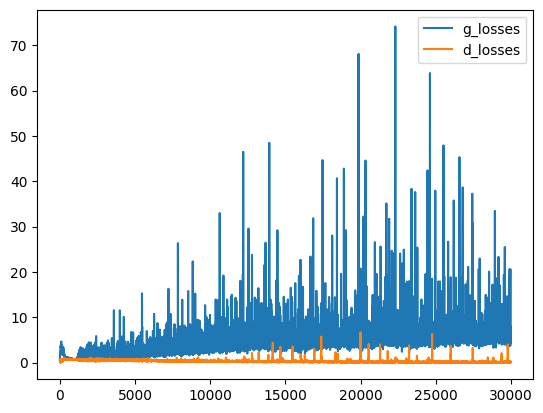

In [39]:
plt.plot(g_losses, label='g_losses')
plt.plot(d_losses, label='d_losses')
plt.legend()

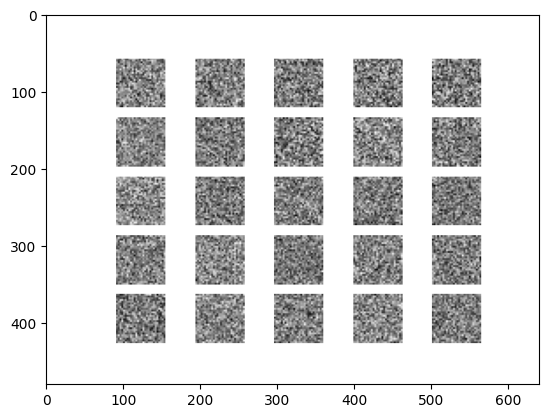

In [46]:
a = cv2.imread('gan_images/0.png')
plt.imshow(a)

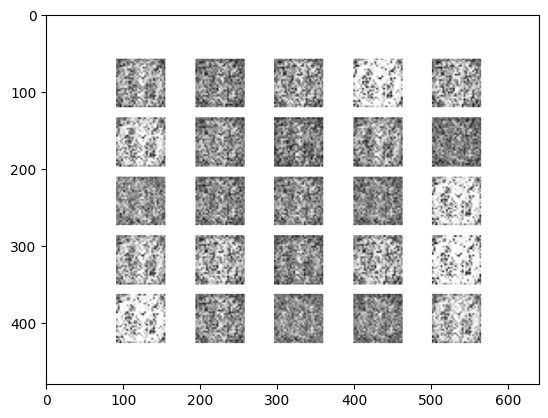

In [47]:
a = cv2.imread('gan_images/1000.png')
plt.imshow(a)

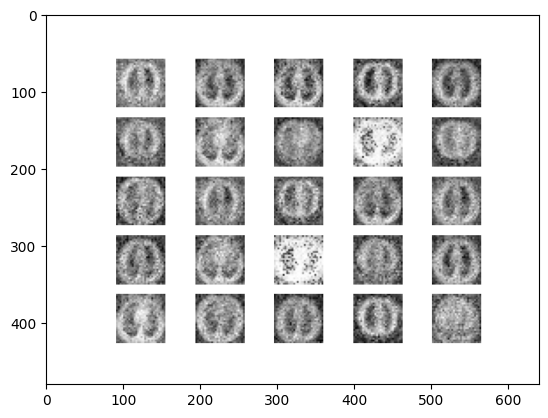

In [48]:
a = cv2.imread('gan_images/5000.png')
plt.imshow(a)

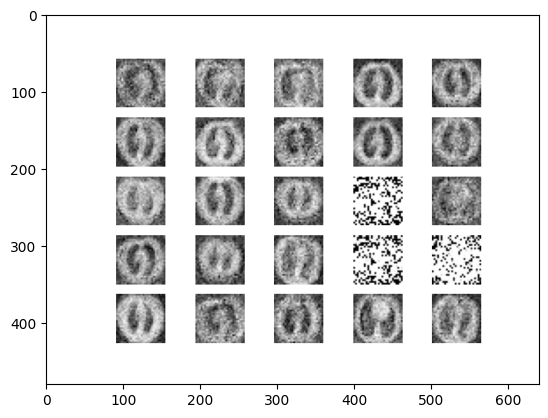

In [49]:
a = cv2.imread('gan_images/10000.png')
plt.imshow(a)

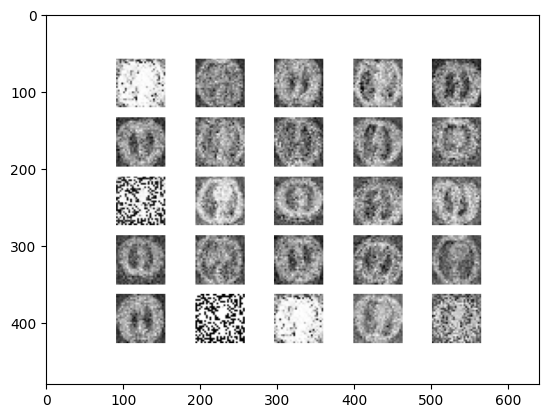

In [50]:
a = cv2.imread('gan_images/20000.png')
plt.imshow(a)

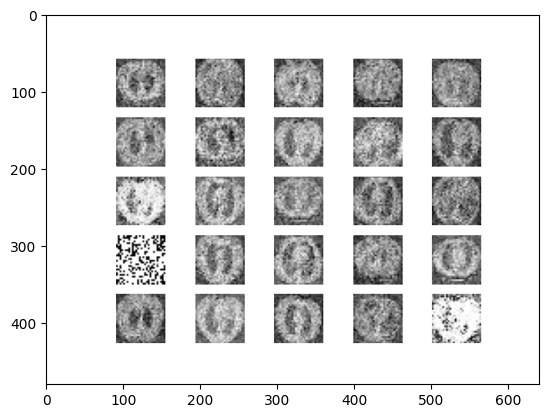

In [51]:
a = cv2.imread('gan_images/29000.png')
plt.imshow(a)

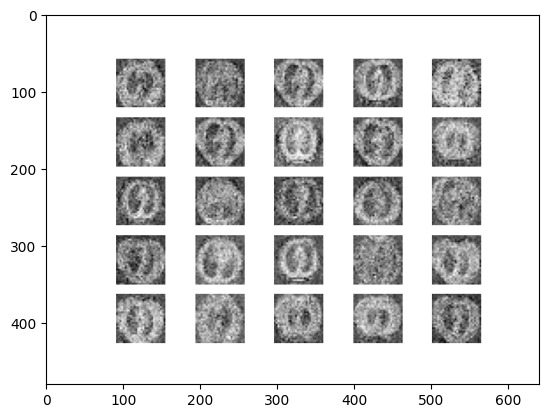

In [54]:
a = cv2.imread('gan_images/29800.png')
plt.imshow(a)